In [1]:
import pandas as pd

#Clean up data by replacing any missing data with Zero or drop the rows.
df = pd.read_csv('D:\\College\\Year4\\RD\\bike_reviews.csv', na_values=['0'])
df

,Customer_ID,Product_ID,Product_Model,Rating
0,1045,1100,Cruiser,3
1,1045,2100,U Lock,4
2,1045,2101,Helmet,5
3,1046,1101,Hybrid Bike,4
4,1046,2101,Helmet,3
5,1046,2102,Front Mudguard,4
6,1047,1102,Folding Bike,5
7,1047,2100,U Lock,4
8,1047,2104,Front Light,2
9,3797,1103,Mountain Bike,3


In [2]:
# Review the data types and drop any columns not required.
df.dtypes

Customer_ID       int64
Product_ID        int64
Product_Model    object
Rating            int64
dtype: object

In [3]:
# Find users who liked the same items (similar users who rated the items above 3)
df_sim = df[(df['Rating'] > 3)].sort_values(by=['Product_ID'], ascending=False).reset_index(drop=True)
df_sim

,Customer_ID,Product_ID,Product_Model,Rating
0,8184,2104,Front Light,4
1,7868,2104,Front Light,4
2,1046,2102,Front Mudguard,4
3,3797,2102,Front Mudguard,4
4,1773,2102,Front Mudguard,4
5,1045,2101,Helmet,5
6,3559,2101,Helmet,4
7,8184,2101,Helmet,5
8,3357,2101,Helmet,5
9,3266,2101,Helmet,4


In [4]:
# Find out how much all users liked all the items (percentages)
df_percent = df.groupby('Product_Model').size().reset_index(name='Total_Ratings')
df_percent['Percentage'] = (df_percent['Total_Ratings'] / df_percent['Total_Ratings'].sum()) * 100
df_percent

,Product_Model,Total_Ratings,Percentage
0,BMX,3,6.521739
1,Cruiser,3,6.521739
2,Electric Bike,2,4.347826
3,Folding Bike,2,4.347826
4,Front Light,4,8.695652
5,Front Mudguard,5,10.869565
6,Helmet,9,19.565217
7,Hybrid Bike,2,4.347826
8,Mountain Bike,2,4.347826
9,Rear Light,1,2.173913


In [5]:
# Use concat to compare similar and all users liked the items (percentages)
df_compare = pd.concat([df_sim, df_percent], axis=1)
df_compare


,Customer_ID,Product_ID,Product_Model,Rating,Product_Model,Total_Ratings,Percentage
0,8184,2104,Front Light,4,BMX,3.0,6.521739
1,7868,2104,Front Light,4,Cruiser,3.0,6.521739
2,1046,2102,Front Mudguard,4,Electric Bike,2.0,4.347826
3,3797,2102,Front Mudguard,4,Folding Bike,2.0,4.347826
4,1773,2102,Front Mudguard,4,Front Light,4.0,8.695652
5,1045,2101,Helmet,5,Front Mudguard,5.0,10.869565
6,3559,2101,Helmet,4,Helmet,9.0,19.565217
7,8184,2101,Helmet,5,Hybrid Bike,2.0,4.347826
8,3357,2101,Helmet,5,Mountain Bike,2.0,4.347826
9,3266,2101,Helmet,4,Rear Light,1.0,2.173913


In [6]:
# create a recommendation "score" (or affinity score)
#total ratings
df['Total_Ratings'] = df.groupby('Product_Model')['Product_Model'].transform('count')

df['Score'] = df['Rating'] * df['Total_Ratings']
df

,Customer_ID,Product_ID,Product_Model,Rating,Total_Ratings,Score
0,1045,1100,Cruiser,3,3,9
1,1045,2100,U Lock,4,10,40
2,1045,2101,Helmet,5,9,45
3,1046,1101,Hybrid Bike,4,2,8
4,1046,2101,Helmet,3,9,27
5,1046,2102,Front Mudguard,4,5,20
6,1047,1102,Folding Bike,5,2,10
7,1047,2100,U Lock,4,10,40
8,1047,2104,Front Light,2,4,8
9,3797,1103,Mountain Bike,3,2,6


In [7]:
# Complete the full item details by using merge data from "bike_catalogue.csv"
df_cat = pd.read_csv('D:\\College\\Year4\\RD\\bike_catalogue.csv')
df_cat.drop(["Product_Model"], axis=1, inplace=True)

# Merge the two dataframes and move rating and total_ratings to the end
df_full = pd.merge(df, df_cat, on='Product_ID')
df_full = df_full[['Product_ID', 'Product_Model', 'Category', 'Price', 'Rating', 'Total_Ratings', 'Score']]
df_full


,Product_ID,Product_Model,Category,Price,Rating,Total_Ratings,Score
0,1100,Cruiser,Off Road,318.32,3,3,9
1,2100,U Lock,Accessories,48.00,4,10,40
2,2101,Helmet,Accessories,42.00,5,9,45
3,1101,Hybrid Bike,Street,"3,093.47",4,2,8
4,2101,Helmet,Accessories,42.00,3,9,27
5,2102,Front Mudguard,Accessories,26.00,4,5,20
6,1102,Folding Bike,Street,"4,247.99",5,2,10
7,2100,U Lock,Accessories,48.00,4,10,40
8,2104,Front Light,Accessories,12.00,2,4,8
9,1103,Mountain Bike,Off Road,"1,722.01",3,2,6


In [8]:
# Create an item list (for all items) that recommends to the user in order of preference (include product names, category and price)
df_recommend = df_full.groupby('Product_ID').agg({'Score': 'sum', 'Total_Ratings': 'sum'})
df_recommend['Recommendation'] = df_recommend['Score'] / df_recommend['Total_Ratings']
df_recommend = df_recommend.sort_values(by='Recommendation', ascending=False).reset_index()
df_recommend

,Product_ID,Score,Total_Ratings,Recommendation
0,1102,20,4,5.000000
1,1100,39,9,4.333333
2,1101,16,4,4.000000
3,1104,36,9,4.000000
4,2100,390,100,3.900000
5,2101,297,81,3.666667
6,2102,90,25,3.600000
7,1103,14,4,3.500000
8,1105,14,4,3.500000
9,2104,48,16,3.000000


In [9]:
# Create a new list that only shows the highest recommended item for each item (display the Product Name & Price only).
df_recommend_max = df_recommend.groupby('Product_ID').agg({'Recommendation': 'max'})
df_recommend_max = df_recommend_max.merge(df_full, on='Recommendation')
df_recommend_max = df_recommend_max[['Product_ID', 'Product_Model', 'Category', 'Price']]
df_recommend_max

KeyError: 'Recommendation'

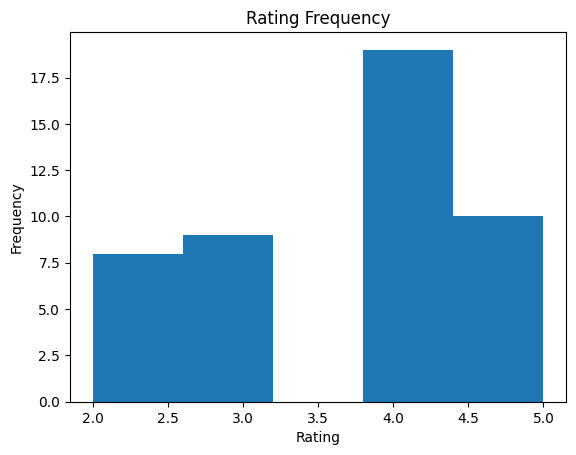

In [ ]:
# Include any extra code (or plot any graph) that you think would help Alexa management better interpret this data.
import matplotlib.pyplot as plt

df_full['Rating'].plot(kind='hist', bins=5)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Rating Frequency')
plt.show()